# Linear Models
- Simple Linear Regression
- Multiple Linear Regression
- Ridge Regression
- Lasso Regression

## Load Packages and Data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold, validation_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso

from tqdm import tqdm


# this extension properly formats a cell after it is run
# !{sys.executable} -m pip install nb_black # UNCOMMENT TO INSTALL
%load_ext nb_black
%matplotlib inline

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)

# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

np.random.seed(42)

<IPython.core.display.Javascript object>

In [2]:
# Load the Ames, Iowa housing dataset
data = pd.read_csv("../data/housing_corr.csv")
data.shape

(2558, 65)

<IPython.core.display.Javascript object>

## Simple Linear Regression

#### Using TotalSF as Predictor

In [3]:
X = data["TotalSF"].values.reshape(-1, 1)
y = data["SalePrice"].values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define the linear regression model
lm = LinearRegression()

# Fit Model
lm.fit(X_train, y_train)

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Calculate the R-squared score using cross-validation
scores = cross_val_score(lm, X_test, y_test, cv=cv, scoring="r2")

# Print the average R-squared score across all cross-validation folds
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.6409440488428209


<IPython.core.display.Javascript object>

#### Using OverallQual as Predictor

In [4]:
X = data["OverallQual"].values.reshape(-1, 1)
y = data["SalePrice"].values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Define the linear regression model
lm = LinearRegression()

# Fit Model
lm.fit(X_train, y_train)

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Calculate the R-squared score using cross-validation
scores = cross_val_score(lm, X_test, y_test, cv=cv, scoring="r2")

# Print the average R-squared score across all cross-validation folds
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.6004552005801451


<IPython.core.display.Javascript object>

## Multiple Linear Regression

#### With 2 Features: TotalSF & OverallQual

In [5]:
X = data[["OverallQual", "TotalSF"]]
y = data["SalePrice"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Define the linear regression model
lm = LinearRegression()

# Fit Model
lm.fit(X_train, y_train)

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Calculate the R-squared score using cross-validation
scores = cross_val_score(lm, X_test, y_test, cv=cv, scoring="r2")

# Print the average R-squared score across all cross-validation folds
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.7637351270889805


<IPython.core.display.Javascript object>

## Dummify Categorical Values

In [6]:
cat_cols = data.select_dtypes(include=["object"])
cat_cols.nunique()

MSZoning             6
Street               2
Alley                3
LotShape             4
LandContour          4
Utilities            2
LotConfig            5
LandSlope            3
Neighborhood        26
Condition1           9
Condition2           8
BldgType             5
HouseStyle           8
RoofStyle            6
RoofMatl             7
Exterior1st         15
Exterior2nd         16
MasVnrType           4
Foundation           6
Heating              6
CentralAir           2
Electrical           4
Functional           7
GarageType           8
PavedDrive           3
SaleType            10
SaleCondition        6
MSSubClass_cat      16
Street_type         12
Neighborhood_st    501
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
# Dropping Neighborhood Streeet because 501 unique values, also Dropping PID
drop_cols = ["Neighborhood_st", "PID"]
data = data.drop(drop_cols, axis=1)

<IPython.core.display.Javascript object>

In [8]:
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass_cat',
 'Street_type']

<IPython.core.display.Javascript object>

In [9]:
data

,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,TotalSF,Remodeled,TotalBath,MSSubClass_cat,Street_type,TotalOutdoorSF
0,126000,RL,0.0,7890,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,CBlock,3,3,1,238.0,0.0,618.0,GasA,2,Y,SBrkr,1.0,0.0,0,2,1,2,4,Typ,1,Detchd,1,2.0,3,Y,0,3,2010,WD,Normal,71,60,1712.0,1,2.0,subclass30,AVE,166
1,139500,RL,42.0,4235,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,2,CBlock,4,3,2,552.0,393.0,104.0,GasA,2,Y,SBrkr,1.0,0.0,0,2,1,3,5,Typ,0,Attchd,3,1.0,3,Y,0,2,2009,WD,Normal,25,25,2098.0,0,3.0,subclass120,ST,105
2,124900,C (all),60.0,6060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,Hip,CompShg,MetalSd,MetalSd,None,0.0,2,BrkTil,3,3,1,737.0,0.0,100.0,GasA,4,Y,SBrkr,0.0,0.0,0,2,1,3,5,Typ,0,Detchd,1,1.0,3,N,0,11,2007,WD,Normal,77,0,1838.0,1,1.0,subclass30,ST,282
3,114000,RL,80.0,8146,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,BrkTil,2,3,1,0.0,0.0,405.0,GasA,3,Y,SBrkr,0.0,0.0,0,2,1,2,6,Typ,0,Detchd,1,1.0,3,N,0,5,2009,WD,Normal,109,6,1444.0,1,1.0,subclass70,AVE,279
4,227000,RL,70.0,8400,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,PConc,4,3,1,643.0,0.0,167.0,GasA,4,Y,SBrkr,1.0,0.0,1,3,1,3,6,Typ,0,Attchd,3,2.0,3,Y,0,11,2009,WD,Normal,8,8,2475.0,0,3.5,subclass60,AVE,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,121000,RL,0.0,8854,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,BrkTil,3,3,1,0.0,0.0,952.0,Grav,1,N,FuseF,0.0,0.0,0,2,1,1,4,Typ,1,Detchd,1,1.0,2,P,0,5,2009,WD,Normal,93,59,1904.0,1,1.0,subclass30,AVE,138
2554,139600,RL,0.0,13680,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,2,Slab,0,0,0,0.0,0.0,0.0,GasA,4,Y,FuseA,0.0,0.0,0,4,1,2,8,Min2,1,Attchd,1,2.0,3,Y,0,6,2009,WD,Normal,54,54,1733.0,0,2.0,subclass20,CIR,0
2555,145000,RH,82.0,6270,Pave,No_Alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,CBlock,3,3,1,284.0,0.0,717.0,GasA,2,N,FuseA,0.0,0.0,0,4,2,2,8,Typ,0,2Types,1,3.0,3,Y,0,8,2007,WD,Normal,58,57,3003.0,1,2.0,subclass90,DR,0
2556,217500,RL,0.0,8826,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,2,PConc,4,3,1,841.0,0.0,144.0,GasA,4,Y,SBrkr,1.0,0.0,1,3,1,3,7,Typ,1,Attchd,3,2.0,3,Y,0,7,2007,WD,Normal,7,7,2827.0,0,3.5,subclass60,BLVD,289


<IPython.core.display.Javascript object>

In [10]:
# Apply one-hot encoding to each non-numeric feature
dummies = pd.get_dummies(data, columns=cat_cols)
dummies.shape

(2558, 247)

<IPython.core.display.Javascript object>

In [11]:
data = dummies.copy()
data

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageQual,Fence,MoSold,YrSold,Age,RemodAge,TotalSF,Remodeled,TotalBath,TotalOutdoorSF,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No_Alley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,...,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageType_ParkingSpace,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_cat_subclass120,MSSubClass_cat_subclass150,MSSubClass_cat_subclass160,MSSubClass_cat_subclass180,MSSubClass_cat_subclass190,MSSubClass_cat_subclass20,MSSubClass_cat_subclass30,MSSubClass_cat_subclass40,MSSubClass_cat_subclass45,MSSubClass_cat_subclass50,MSSubClass_cat_subclass60,MSSubClass_cat_subclass70,MSSubClass_cat_subclass75,MSSubClass_cat_subclass80,MSSubClass_cat_subclass85,MSSubClass_cat_subclass90,Street_type_AVE,Street_type_BLVD,Street_type_CIR,Street_type_CT,Street_type_DR,Street_type_EAST,Street_type_LN,Street_type_PKWY,Street_type_PL,Street_type_RD,Street_type_ST,Street_type_WAY
0,126000,0.0,7890,6,6,0.0,2,3,3,1,238.0,0.0,618.0,2,1.0,0.0,0,2,1,2,4,1,1,2.0,3,0,3,2010,71,60,1712.0,1,2.0,166,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,139500,42.0,4235,5,5,149.0,2,4,3,2,552.0,393.0,104.0,2,1.0,0.0,0,2,1,3,5,0,3,1.0,3,0,2,2009,25,25,2098.0,0,3.0,105,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<IPython.core.display.Javascript object>

## Collinearity

In [12]:
# Compute the correlation matrix
corr_matrix = data.drop(["SalePrice"], axis=1).corr()

# Extract only highly correlated columns
threshold = 0.9
highly_correlated_cols = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()
highly_correlated_cols = highly_correlated_cols[
    highly_correlated_cols["level_0"] != highly_correlated_cols["level_1"]
]
highly_correlated_cols = highly_correlated_cols.rename(columns={0: "correlation"})
highly_correlated_cols["abs_correlation"] = highly_correlated_cols["correlation"].abs()
highly_correlated_cols = highly_correlated_cols.sort_values(
    "abs_correlation", ascending=False
)
highly_correlated_cols = highly_correlated_cols.drop("abs_correlation", axis=1)

# Print highly correlated columns with correlation coefficients
for idx, row in highly_correlated_cols.iterrows():
    col1 = row["level_0"]
    col2 = row["level_1"]
    corr = row["correlation"]
    print(f"- {col1} & {col2}: {corr}")

- Street_Pave & Street_Grvl: -1.0000000000000002
- Utilities_AllPub & Utilities_NoSewr: -1.0000000000000002
- Utilities_NoSewr & Utilities_AllPub: -1.0000000000000002
- Street_Grvl & Street_Pave: -1.0000000000000002
- MSSubClass_cat_subclass90 & BldgType_Duplex: 1.0
- Exterior2nd_PreCast & Exterior1st_PreCast: 1.0
- Exterior1st_PreCast & Exterior2nd_PreCast: 1.0
- CentralAir_Y & CentralAir_N: -1.0
- BldgType_Duplex & MSSubClass_cat_subclass90: 1.0
- CentralAir_N & CentralAir_Y: -1.0
- SaleCondition_Partial & SaleType_New: 0.9809427827863278
- SaleType_New & SaleCondition_Partial: 0.9809427827863278
- Exterior1st_VinylSd & Exterior2nd_VinylSd: 0.9807636695953126
- Exterior2nd_VinylSd & Exterior1st_VinylSd: 0.9807636695953126
- Exterior1st_CemntBd & Exterior2nd_CmentBd: 0.9783543189818574
- Exterior2nd_CmentBd & Exterior1st_CemntBd: 0.9783543189818574
- MSSubClass_cat_subclass190 & BldgType_2fmCon: 0.9714080042349095
- BldgType_2fmCon & MSSubClass_cat_subclass190: 0.9714080042349095
- Ex

<IPython.core.display.Javascript object>

In [13]:
# - Street_Grvl & Street_Pave: -1.0000000000000002                   Removing Street_Grvl
# - Street_Pave & Street_Grvl: -1.0000000000000002
# - Utilities_AllPub & Utilities_NoSewr: -1.0000000000000002
# - Utilities_NoSewr & Utilities_AllPub: -1.0000000000000002         Remove Utilities_NoSewr
# - MSSubClass_cat_subclass90 & BldgType_Duplex: 1.0
# - BldgType_Duplex & MSSubClass_cat_subclass90: 1.0                 Remove MSSubClass_cat_subclass90
# - CentralAir_Y & CentralAir_N: -1.0
# - CentralAir_N & CentralAir_Y: -1.0                                Remove CentralAir_N
# - Exterior2nd_PreCast & Exterior1st_PreCast: 1.0
# - Exterior1st_PreCast & Exterior2nd_PreCast: 1.0                   Remove Exterior2nd_PreCast
# - SaleCondition_Partial & SaleType_New: 0.9809427827863278
# - SaleType_New & SaleCondition_Partial: 0.9809427827863278         Remove SaleCondition_Partial
# - Exterior2nd_VinylSd & Exterior1st_VinylSd: 0.9807636695953126    Remove Exterior2nd_VinylSd
# - Exterior1st_VinylSd & Exterior2nd_VinylSd: 0.9807636695953126
# - Exterior2nd_CmentBd & Exterior1st_CemntBd: 0.9783543189818574    Remove Exterior2nd_CmentBd
# - Exterior1st_CemntBd & Exterior2nd_CmentBd: 0.9783543189818574
# - BldgType_2fmCon & MSSubClass_cat_subclass190: 0.9714080042349095 Remove MSSubClass_cat_subclass190
# - MSSubClass_cat_subclass190 & BldgType_2fmCon: 0.9714080042349095
# - Exterior2nd_MetalSd & Exterior1st_MetalSd: 0.9690513412303405    Remove Exterior2nd_MetalSd
# - Exterior1st_MetalSd & Exterior2nd_MetalSd: 0.9690513412303405
# - MSSubClass_cat_subclass80 & HouseStyle_SLvl: 0.9590026216113561  Remove MSSubClass_cat_subclass80
# - HouseStyle_SLvl & MSSubClass_cat_subclass80: 0.9590026216113561
# - RoofStyle_Gable & RoofStyle_Hip: -0.9426704916719517
# - RoofStyle_Hip & RoofStyle_Gable: -0.9426704916719517
# - LandSlope_Gtl & LandSlope_Mod: -0.9412936288411135
# - LandSlope_Mod & LandSlope_Gtl: -0.9412936288411135               Remove LandSlope_Mod
# - LotShape_IR1 & LotShape_Reg: -0.9309688036567451                 Remove LotShape_IR1
# - LotShape_Reg & LotShape_IR1: -0.9309688036567451
# - HouseStyle_1.5Fin & MSSubClass_cat_subclass50: 0.9277523362405384
# - MSSubClass_cat_subclass50 & HouseStyle_1.5Fin: 0.9277523362405384
# - GarageType_No_Garage & GarageQual: -0.9272409877585459
# - GarageQual & GarageType_No_Garage: -0.9272409877585459           Remove GarageType_No_Garage
# - MSSubClass_cat_subclass45 & HouseStyle_1.5Unf: 0.8894971700326837
# - HouseStyle_1.5Unf & MSSubClass_cat_subclass45: 0.8894971700326837
# - Exterior1st_HdBoard & Exterior2nd_HdBoard: 0.8852679148783155
# - Exterior2nd_HdBoard & Exterior1st_HdBoard: 0.8852679148783155
# - Neighborhood_Somerst & MSZoning_FV: 0.8834670138511327
# - MSZoning_FV & Neighborhood_Somerst: 0.8834670138511327
# - Electrical_FuseA & Electrical_SBrkr: -0.8745998704116126
# - Electrical_SBrkr & Electrical_FuseA: -0.8745998704116126
# - Exterior1st_Wd Sdng & Exterior2nd_Wd Sdng: 0.8621010392665579
# - Exterior2nd_Wd Sdng & Exterior1st_Wd Sdng: 0.8621010392665579
# - Exterior1st_AsbShng & Exterior2nd_AsbShng: 0.8607014126218352
# - Exterior2nd_AsbShng & Exterior1st_AsbShng: 0.8607014126218352
# - PavedDrive_N & PavedDrive_Y: -0.8544383217307433
# - PavedDrive_Y & PavedDrive_N: -0.8544383217307433
# - MasVnrType_None & MasVnrType_BrkFace: -0.840633114130026
# - MasVnrType_BrkFace & MasVnrType_None: -0.840633114130026
# - Exterior2nd_Brk Cmn & Neighborhood_NPkVill: 0.83606016365883
# - Neighborhood_NPkVill & Exterior2nd_Brk Cmn: 0.83606016365883
# - MSZoning_RM & MSZoning_RL: -0.8283288487559544
# - MSZoning_RL & MSZoning_RM: -0.8283288487559544

<IPython.core.display.Javascript object>

In [14]:
data.drop(
    [
        "Street_Grvl",
        "Utilities_NoSewr",
        "MSSubClass_cat_subclass90",
        "CentralAir_N",
        "SaleCondition_Partial",
        "Exterior2nd_VinylSd",
        "Exterior2nd_CmentBd",
        "MSSubClass_cat_subclass190",
        "Exterior2nd_MetalSd",
        "MSSubClass_cat_subclass80",
        "LotShape_IR1",
        "LandSlope_Mod",
        "GarageType_No_Garage",
        "Exterior2nd_PreCast",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [15]:
## Checking to see what correlated features are left

# Compute the correlation matrix
corr_matrix = data.drop(["SalePrice"], axis=1).corr()

# Extract only highly correlated columns
threshold = 0.9
highly_correlated_cols = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()
highly_correlated_cols = highly_correlated_cols[
    highly_correlated_cols["level_0"] != highly_correlated_cols["level_1"]
]
highly_correlated_cols = highly_correlated_cols.rename(columns={0: "correlation"})
highly_correlated_cols["abs_correlation"] = highly_correlated_cols["correlation"].abs()
highly_correlated_cols = highly_correlated_cols.sort_values(
    "abs_correlation", ascending=False
)
highly_correlated_cols = highly_correlated_cols.drop("abs_correlation", axis=1)

# Print highly correlated columns with correlation coefficients
for idx, row in highly_correlated_cols.iterrows():
    col1 = row["level_0"]
    col2 = row["level_1"]
    corr = row["correlation"]
    print(f"- {col1} & {col2}: {corr}")

- RoofStyle_Gable & RoofStyle_Hip: -0.9426704916719517
- RoofStyle_Hip & RoofStyle_Gable: -0.9426704916719517
- HouseStyle_1.5Fin & MSSubClass_cat_subclass50: 0.9277523362405384
- MSSubClass_cat_subclass50 & HouseStyle_1.5Fin: 0.9277523362405384


<IPython.core.display.Javascript object>

## Ridge Regression

In [16]:
X = data.loc[:, data.columns != "SalePrice"]
y = data.loc[:, "SalePrice"]

<IPython.core.display.Javascript object>

In [17]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Define the linear regression model
ridge = Ridge(alpha=1.0)

# Fit Model
ridge.fit(X_train, y_train)

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Calculate the R-squared score using cross-validation
scores = cross_val_score(ridge, X_test, y_test, cv=cv, scoring="r2")

# Print the average R-squared score across all cross-validation folds
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.8419350572809685


<IPython.core.display.Javascript object>

#### Optimizing Alpha Value

In [19]:
alphas = np.arange(0, 3)
coefs = []
scores = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    scores.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index=alphas, columns=X_train.columns)
coefs.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageQual,Fence,MoSold,YrSold,Age,RemodAge,TotalSF,Remodeled,TotalBath,TotalOutdoorSF,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ParkingSpace,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,MSSubClass_cat_subclass120,MSSubClass_cat_subclass150,MSSubClass_cat_subclass160,MSSubClass_cat_subclass180,MSSubClass_cat_subclass20,MSSubClass_cat_subclass30,MSSubClass_cat_subclass40,MSSubClass_cat_subclass45,MSSubClass_cat_subclass50,MSSubClass_cat_subclass60,MSSubClass_cat_subclass70,MSSubClass_cat_subclass75,MSSubClass_cat_subclass85,Street_type_AVE,Street_type_BLVD,Street_type_CIR,Street_type_CT,Street_type_DR,Street_type_EAST,Street_type_LN,Street_type_PKWY,Street_type_PL,Street_type_RD,Street_type_ST,Street_type_WAY
0,25.017619,47.010006,568319.956853,172995.385583,297.815145,-308361.515423,295356.235929,-1.367119e+06,122312.032668,-1372.001379,-836.198395,-1118.018997,-13843.914910,-235218.403166,2.995502e+06,442286.040795,-20313.557889,-4.288829e+06,1.178808e+06,-315701.792875,768743.232703,409614.829867,-60688.377530,878511.753105,-244373.089788,79605.365368,232564.555428,65155.710922,42306.770757,1013.033402,1.460384e+06,412279.082956,580.643689,4.034576e+16,4.034576e+16,4.034576e+16,4.034576e+16,4.034576e+16,4.034576e+16,-1.908312e+06,1.241348e+17,1.241348e+17,1.241348e+17,-5.124277e+06,-3.055568e+06,778980.183302,-2.193172e+17,-2.193172e+17,-2.193172e+17,-2.193172e+1

<IPython.core.display.Javascript object>

Text(0, 0.5, 'slope values')

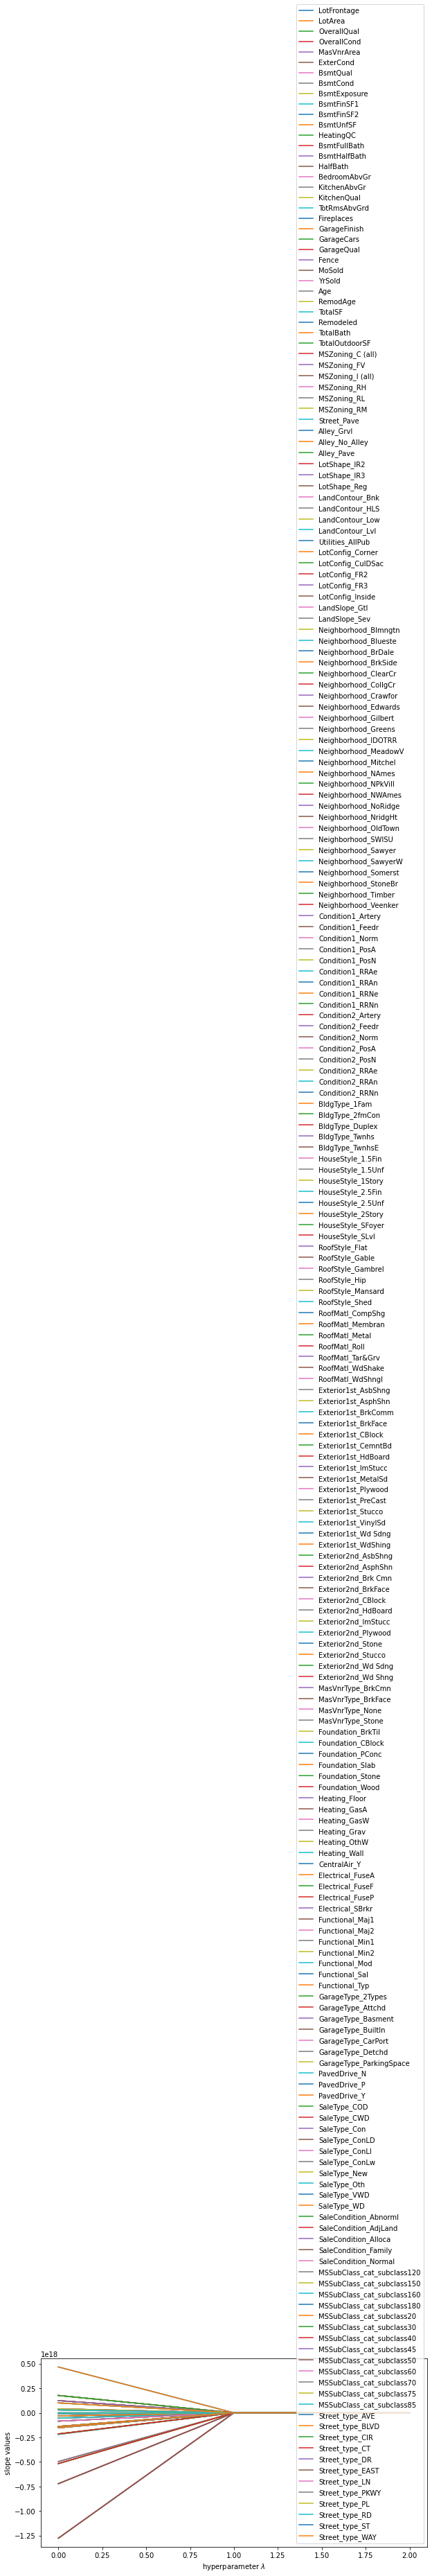

<IPython.core.display.Javascript object>

In [20]:
plt.rcParams["figure.figsize"] = (10, 5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"slope values")

Looks like alpha of 1 is great, even though its the default

Text(0, 0.5, '$R^2$')

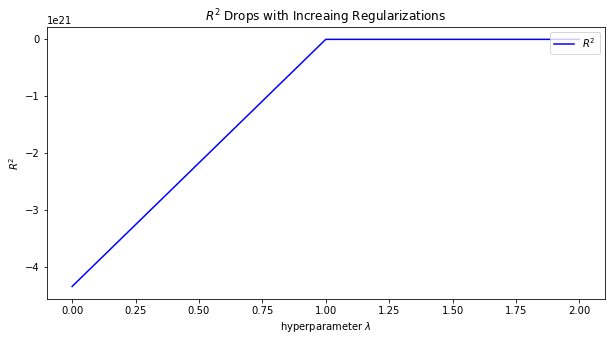

<IPython.core.display.Javascript object>

In [21]:
plt.plot(alphas, scores, c="b", label=r"$R^2$")
plt.legend(loc=1)
plt.title(r"$R^2$ Drops with Increaing Regularizations")
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")

In [23]:
lasso = Lasso(max_iter=1000)

ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test = []
lasso_scores_test = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    lasso.set_params(alpha=alpha)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge_scores_train.append(ridge.score(X_train, y_train))
    ridge_scores_test.append(ridge.score(X_test, y_test))
    lasso_scores_train.append(lasso.score(X_train, y_train))
    lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train)
ridge_scores_test = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train)
lasso_scores_test = np.array(lasso_scores_test)

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.139e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.699e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.395e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.190e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.170e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

<IPython.core.display.Javascript object>

ValueError: zero-size array to reduction operation maximum which has no identity

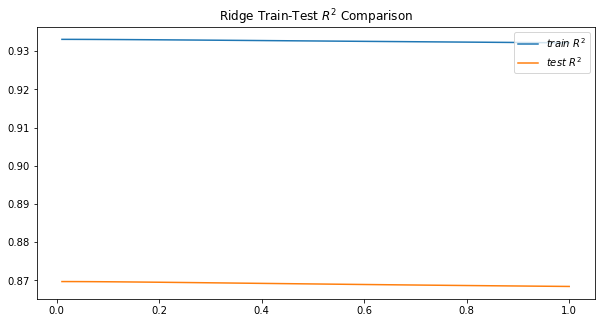

<IPython.core.display.Javascript object>

In [24]:
plt.plot(alphas, ridge_scores_train, label=r"$train\ R^2$")
plt.plot(alphas, ridge_scores_test, label=r"$test\ R^2$")
plt.legend(loc=1)
plt.title(r"Ridge Train-Test $R^2$ Comparison")
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle="--", color="g", label="optimal lambda", alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")

## Lasso Regression

In [26]:
X = data.loc[:, data.columns != "SalePrice"]
y = data.loc[:, "SalePrice"]

<IPython.core.display.Javascript object>

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Define model
lasso = Lasso(alpha=1.0, max_iter=10000)  # Increasing Max Iterations

# Fit Model
lasso.fit(X_train, y_train)

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Calculate the R-squared score using cross-validation
scores = cross_val_score(lasso, X_test, y_test, cv=cv, scoring="r2")

# Print the average R-squared score across all cross-validation folds
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.8431503634978725


<IPython.core.display.Javascript object>

In [28]:
lasso = Lasso(max_iter=1000)
alphas = np.linspace(0.1, 20.1, 20)
lasso.set_params()
coefs_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index=alphas, columns=X_train.columns)
coefs_lasso.head()

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.910e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+11, tolerance: 9.519e+08
  model = cd_fast.enet_coordinate_descent(
/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,HeatingQC,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageQual,Fence,MoSold,YrSold,Age,RemodAge,TotalSF,Remodeled,TotalBath,TotalOutdoorSF,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_ParkingSpace,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,MSSubClass_cat_subclass120,MSSubClass_cat_subclass150,MSSubClass_cat_subclass160,MSSubClass_cat_subclass180,MSSubClass_cat_subclass20,MSSubClass_cat_subclass30,MSSubClass_cat_subclass40,MSSubClass_cat_subclass45,MSSubClass_cat_subclass50,MSSubClass_cat_subclass60,MSSubClass_cat_subclass70,MSSubClass_cat_subclass75,MSSubClass_cat_subclass85,Street_type_AVE,Street_type_BLVD,Street_type_CIR,Street_type_CT,Street_type_DR,Street_type_EAST,Street_type_LN,Street_type_PKWY,Street_type_PL,Street_type_RD,Street_type_ST,Street_type_WAY
0.100000,25.093330,1.108405,8905.368628,6041.568531,39.856344,58.496252,2783.384847,-4426.816010,2574.242197,-28.824257,-42.744122,-51.268245,2127.645515,1292.163699,2814.241442,2185.611091,-3945.516686,-5616.772107,7246.002596,450.008614,3117.119397,1266.313225,6424.892169,3845.936394,-79.780030,-350.134888,384.444629,-438.633016,-26.161159,61.814121,-455.506222,-459.937242,10.489386,-4034.346669,3732.925788,-31278.945052,4259.960242,6705.120092,-2348.648418,9544.374120,-235.309948,4358.921652,-2188.845760,6204.215270,-15847.044281,-127.317487,-3480.698210,10240.722062,1840.229518,-125.349354,0.0,-1766.257353,367.342302,-7644.946197,-12238.453216,910.041312,49

<IPython.core.display.Javascript object>

Text(0, 0.5, 'slope values')

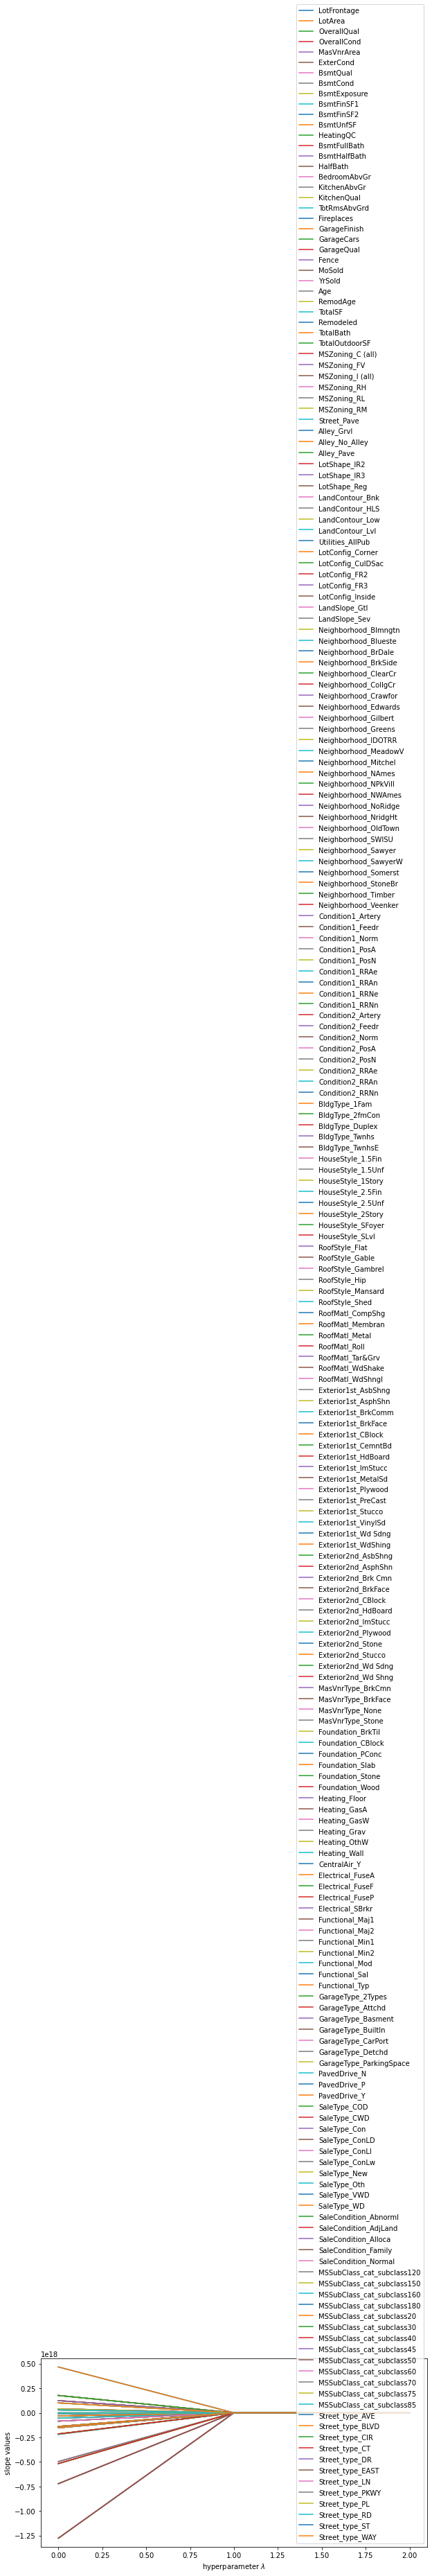

<IPython.core.display.Javascript object>

In [29]:
plt.rcParams["figure.figsize"] = (10, 5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"slope values")

ValueError: x and y must have same first dimension, but have shapes (20,) and (100,)

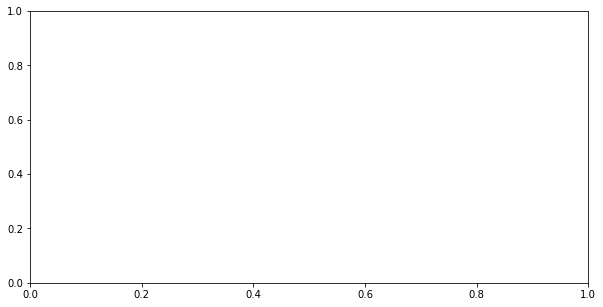

<IPython.core.display.Javascript object>

In [30]:
plt.plot(alphas, lasso_scores_train, label=r"$train\ R^2$")
plt.plot(alphas, lasso_scores_test, label=r"$test\ R^2$")
plt.title(r"Lasso Train-Test $R^2$ Comparison")
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle="--", color="g", label="optimal lambda", alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r"hyperparameter $\lambda$")
plt.ylabel(r"$R^2$")

## Elasticnet

In [31]:
X = data.loc[:, data.columns != "SalePrice"]
y = data.loc[:, "SalePrice"]

<IPython.core.display.Javascript object>

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

# Define Model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)


# print(r'The R^2 is %.2f' %(elasticnet.score(house_features, prices)))
# elasticnet.coef_,  elasticnet.intercept_


# Fit Model
elasticnet.fit(X_train, y_train)

# Define the cross-validation scheme
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Calculate the R-squared score using cross-validation
scores = cross_val_score(elasticnet, X_test, y_test, cv=cv, scoring="r2")

# Print the average R-squared score across all cross-validation folds
print(f"Average R-squared score: {scores.mean()}")

Average R-squared score: 0.8546600978546169


<IPython.core.display.Javascript object>